# Trabajo evaluable de Python

**Alumno**: Daniel Ranchal Parrado

**Correo electrónico**: [danielranchal@correo.uco.es](mailto:danielranchal@correo.ugr.es)

**Asignatura**: Introducción a la programación a la ciencia de datos

**Curso**: 2021/2022

## Descripción del dataset

El dataset que se ha escogido para este trabajo es [Congressional Voting Records](https://archive.ics.uci.edu/ml/datasets/congressional+voting+records), que se encuentra en el repositorio de datasets de UCI. EL dataset recoge los votos de cada congresista del nonagésimo octavo congreso de los Estados Unidos sobre 16 elementos clave identificados por el Congressional Quarterly (CQA). El CQA identifica 9 tipos de votos: voto a favor, posición a favor, anunciado a favor (estos tres se han simplificado a "yes"), voto en contra, posición en contra, anunciado en contra (estos tres se han simplificado a "no"), vota abstención, vota abstención por conflicto de intereses y no vota o no se conoce la posición (estos últimos tres se simplifican a valor perdido).
Los atributos de este dataset son los siguientes:
- **handicapped-infants**. Variable binaria
- **water-project-cost-sharing**. Variable binaria
- **adoption-of-the-budget-resolution**. Variable binaria
- **physician-fee-freeze**. Variable binaria
- **el-salvador-aid**. Variable binaria
- **religious-groups-in-schools**. Variable binaria
- **anti-satellite-test-ban**. Variable binaria
- **aid-to-nicaraguan-contras**. Variable binaria
- **mx-missile**. Variable binaria
- **immigration**. Variable binaria
- **synfuels-corporation-cutback**. Variable binaria
- **education-spending**. Variable binaria
- **superfund-right-to-sue**. Variable binaria
- **crime**. Variable binaria
- **duty-free-exports**. Variable binaria
- **export-administration-act-south-africa**. Variable binaria

La variable a predecir es **Class** que toma los valores "democrat" o "republican"

## Lectura y preprocesamiento del dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import uniform
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
columns = [
    "handicapped-infants",
    "water-project-cost-sharing",
    "adoption-of-the-budget-resolution",
    "physician-fee-freeze",
    "el-salvador-aid",
    "religious-groups-in-schools",
    "anti-satellite-test-ban",
    "aid-to-nicaraguan-contras",
    "mx-missile",
    "immigration",
    "synfuels-corporation-cutback",
    "education-spending",
    "superfund-right-to-sue",
    "crime",
    "duty-free-exports",
    "export-administration-act-south-africa"
]

In [3]:
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
    header=None,
    names=["Class"] + columns
)

Class = data.pop("Class")
data["Class"] = Class

In [4]:
data

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y,republican
431,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y,democrat
432,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y,republican
433,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y,republican


Como se observa, existen valores perdidos en las diferente columnas y esto se debe a que los autores de este dataset han identificado los votos de abstención como valores perdidos. Lo que se va a hacer es sustituir esos valores perdidos por el valor "p" (que viene de present cuyo significado es abstención) y por lo tanto, las columnas con valores binarios se convertirán en valores categóricos.

In [5]:
data.where(data != '?', 'p', inplace=True)

Una vez hecho esto, separamos los predictores y la clase en diferentes variables

In [6]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [7]:
enc = OneHotEncoder()
X = enc.fit_transform(X).toarray()
X = pd.DataFrame(X, columns=enc.get_feature_names_out())
X

,handicapped-infants_n,handicapped-infants_p,handicapped-infants_y,water-project-cost-sharing_n,water-project-cost-sharing_p,water-project-cost-sharing_y,adoption-of-the-budget-resolution_n,adoption-of-the-budget-resolution_p,adoption-of-the-budget-resolution_y,physician-fee-freeze_n,...,superfund-right-to-sue_y,crime_n,crime_p,crime_y,duty-free-exports_n,duty-free-exports_p,duty-free-exports_y,export-administration-act-south-africa_n,export-administration-act-south-africa_p,export-administration-act-south-africa_y
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
431,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
432,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
433,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [8]:
Y

0      republican
1      republican
2        democrat
3        democrat
4        democrat
          ...    
430    republican
431      democrat
432    republican
433    republican
434    republican
Name: Class, Length: 435, dtype: object

## Visualización de los datos

A continuación se muestra la visualización de cada variable (en este caso de cada votación) agrupadas por la filiación política (demócratas o republicanos).

<AxesSubplot:xlabel='handicapped-infants', ylabel='count'>

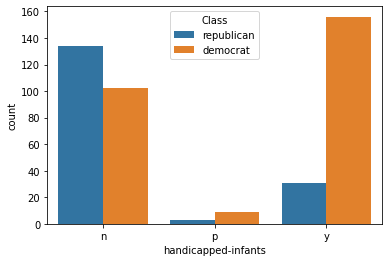

In [9]:
sns.countplot(x="handicapped-infants", hue="Class", data=data)

<AxesSubplot:xlabel='water-project-cost-sharing', ylabel='count'>

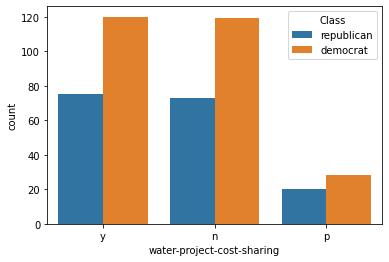

In [10]:
sns.countplot(x="water-project-cost-sharing", hue="Class", data=data)

<AxesSubplot:xlabel='adoption-of-the-budget-resolution', ylabel='count'>

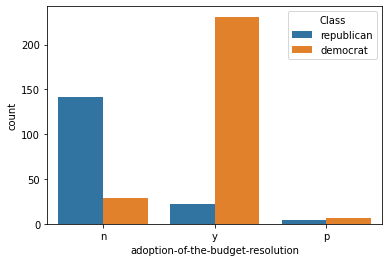

In [11]:
sns.countplot(x="adoption-of-the-budget-resolution", hue="Class", data=data)

<AxesSubplot:xlabel='physician-fee-freeze', ylabel='count'>

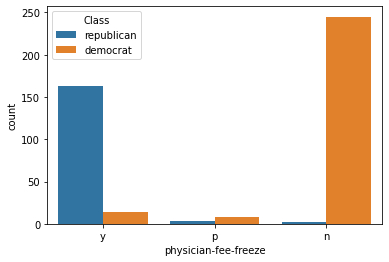

In [12]:
sns.countplot(x="physician-fee-freeze", hue="Class", data=data)

<AxesSubplot:xlabel='el-salvador-aid', ylabel='count'>

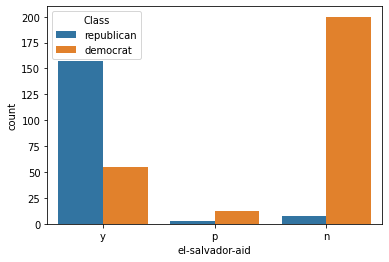

In [13]:
sns.countplot(x="el-salvador-aid", hue="Class", data=data)

<AxesSubplot:xlabel='religious-groups-in-schools', ylabel='count'>

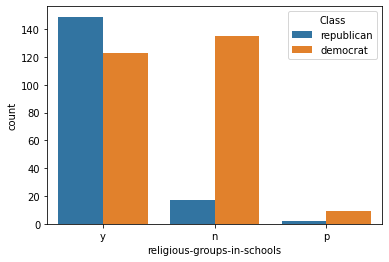

In [14]:
sns.countplot(x="religious-groups-in-schools", hue="Class", data=data)

<AxesSubplot:xlabel='anti-satellite-test-ban', ylabel='count'>

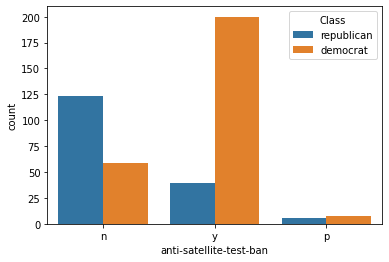

In [15]:
sns.countplot(x="anti-satellite-test-ban", hue="Class", data=data)

<AxesSubplot:xlabel='aid-to-nicaraguan-contras', ylabel='count'>

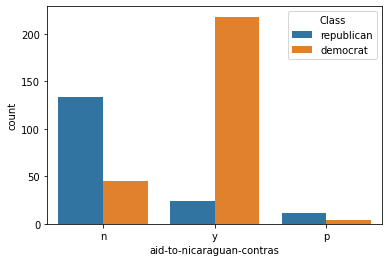

In [16]:
sns.countplot(x="aid-to-nicaraguan-contras", hue="Class", data=data)

<AxesSubplot:xlabel='mx-missile', ylabel='count'>

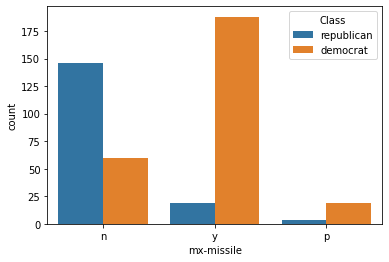

In [17]:
sns.countplot(x="mx-missile", hue="Class", data=data)

<AxesSubplot:xlabel='immigration', ylabel='count'>

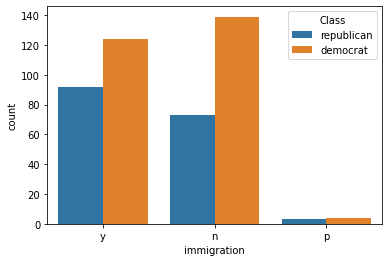

In [18]:
sns.countplot(x="immigration", hue="Class", data=data)

<AxesSubplot:xlabel='synfuels-corporation-cutback', ylabel='count'>

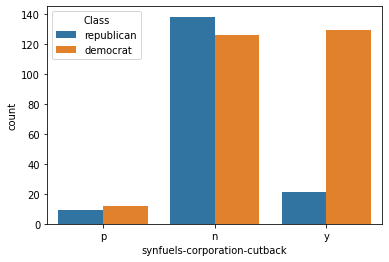

In [19]:
sns.countplot(x="synfuels-corporation-cutback", hue="Class", data=data)

<AxesSubplot:xlabel='education-spending', ylabel='count'>

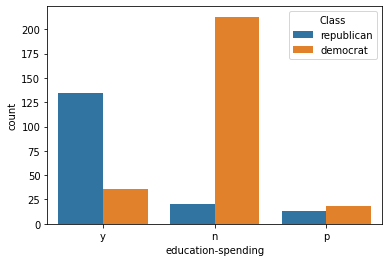

In [20]:
sns.countplot(x="education-spending", hue="Class", data=data)

<AxesSubplot:xlabel='superfund-right-to-sue', ylabel='count'>

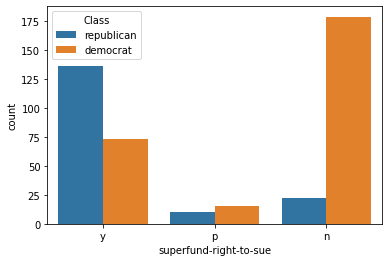

In [21]:
sns.countplot(x="superfund-right-to-sue", hue="Class", data=data)

<AxesSubplot:xlabel='crime', ylabel='count'>

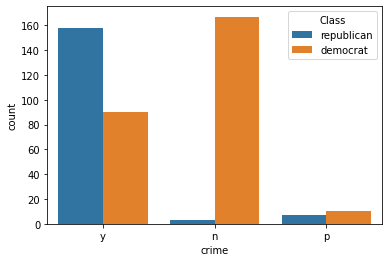

In [22]:
sns.countplot(x="crime", hue="Class", data=data)

<AxesSubplot:xlabel='duty-free-exports', ylabel='count'>

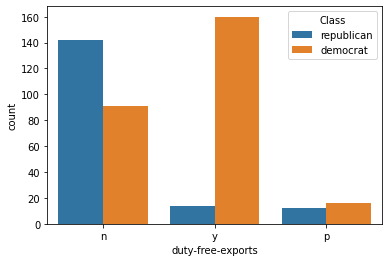

In [23]:
sns.countplot(x="duty-free-exports", hue="Class", data=data)

<AxesSubplot:xlabel='export-administration-act-south-africa', ylabel='count'>

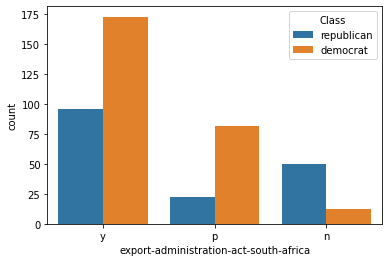

In [24]:
sns.countplot(x="export-administration-act-south-africa", hue="Class", data=data)

## Reducción de la dimensionalidad con PCA

A continuación se aplica una reducción de dimensionalidad utilizando **PCA**. Se va a probar a reducir a 2 y 3 dimensiones. Cada ejecución ira acompañado de un scatter plot.

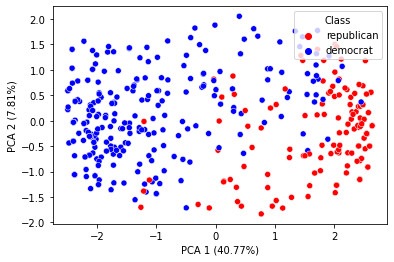

In [25]:
pca = PCA(n_components=2)
pca_x = pd.DataFrame(pca.fit_transform(X), columns=["PCA1", "PCA2"])
variance_ratio = pca.explained_variance_ratio_

ax = sns.scatterplot(
    data=pca_x,
    x="PCA1",
    y="PCA2",
    hue=Y,
    palette={
        'republican': 'red',
        'democrat': 'blue'
    }
)
ax.set(
    xlabel=f'PCA 1 ({round(variance_ratio[0]*100, 2)}%)',
    ylabel=f'PCA 2 ({round(variance_ratio[1]*100, 2)}%)'
)
plt.show()

<IPython.core.display.Javascript object>


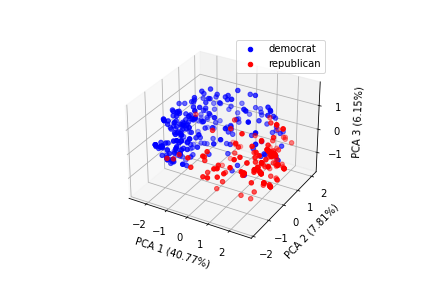

In [26]:
%matplotlib notebook
pca_3_d = PCA(n_components=3)
pca_x_3_d = pd.DataFrame(pca_3_d.fit_transform(X), columns=["PCA1", "PCA2", "PCA3"])
variance_ratio_3d = pca_3_d.explained_variance_ratio_

fig1 = plt.figure()
ax1 = fig1.add_subplot(projection='3d')

for label, color in zip(['democrat', 'republican'], ['blue', 'red']):
    ax1.scatter(
        pca_x_3_d.iloc[(Y == label).values, 0],
        pca_x_3_d.iloc[(Y == label).values, 1],
        pca_x_3_d.iloc[(Y == label).values, 2],
        c=color,
        label=label
    )
ax1.set_xlabel(f'PCA 1 ({round(variance_ratio_3d[0]*100, 2)}%)')
ax1.set_ylabel(f'PCA 2 ({round(variance_ratio_3d[1]*100, 2)}%)')
ax1.set_zlabel(f'PCA 3 ({round(variance_ratio_3d[2]*100, 2)}%)')

ax1.legend()
plt.show()

Para que la reducción de componentes sea lo suficiente buena, la suma de la varianza explicada tendría que estar alrededor del 70%. Pero como se puede ver, la reducción a 2 y 3 componentes principales, que son las únicas que podemos representar gráficamente, no sería adecuada.

## Estimación de parámetros con Grid Search y Random Search

En este apartado se pretende buscar los mejores parámetros utilizando los estimadores Grid Search y Random search para los clasificadores **Decision Tree**, **SVM** y **kNN** de **scikit-learn**.

### Grid Search

**Grid Search**, o búsqueda por rejilla, se basa en probar todas las opciones posibles que se han definido en la rejilla y quedarse con la mejor combinación que suponga una mejor métrica. La métrica se puede definir al inicializar la búsqueda y en este caso se utilizará la tasa de acierto o CCR

Primero se empieza con el clasificador de **Decision Tree**. Se han indicado varios valores para la máxima profundidad, el mínimo de instancias para hacer un split, y el mínimo de instancias en una hoja.

In [27]:
param_grid_tree = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf':  [1, 2, 3, 4, 5]
}

grid_search_tree_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_tree,
    scoring='accuracy',
    n_jobs=-1
)

Se ejecuta el **Grid Search** con el dataset que tenemos y se obtiene que el mejor **árbol de decisión** con ese dataset y con los parámetros que se habían fijado anteriormente, tiene una profundidad máxima de 4, un mínimo de instancias por split de 2 y un mínimo de instancias por hoja de 1.

In [28]:
grid_search_tree_clf.fit(X, Y)
grid_search_tree_clf.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=42)

A continuación se utiliza **SVM** con **Grid Search**. Se ha indicado un rango de valores para el elemento de penalización C, el tipo de kernel, el grado del polinomio y el coeficiente gamma del kernel.

In [29]:
param_grid_smv = {
    'C': [1e-1, 1, 10, 25, 50, 100],
    'kernel': ['poly', 'rbf'],
    'degree': [2, 3, 4, 5, 6],
    'gamma': [1e-1, 1, 10, 25, 50, 100]
}

grid_search_svm_clf = GridSearchCV(
    SVC(random_state=42),
    param_grid=param_grid_smv,
    scoring='accuracy',
    n_jobs=-1,
)

Se ejecuta el **Grid Search** con el dataset que tenemos y se obtiene que el mejor modelo de **SVM** con ese dataset y con los parámetros que se habían fijado anteriormente, tiene una penalización C de 0.1, un kernel polinomial, un grado polinomial de 5 y un coeficiente gamma de 0.1

In [30]:
grid_search_svm_clf.fit(X, Y)
print(grid_search_svm_clf.best_estimator_)

SVC(C=0.1, degree=5, gamma=0.1, kernel='poly', random_state=42)


A continuación se utiliza **kNN** con **Grid Search**. Se ha indicado un rango de valores para el número de vecinos y el parámetro de la potencia para la métrica de Minkowski, donde 1 es la distancia de Manhattan y 2 la distancia euclídea

In [31]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'p': [1, 2]
}

grid_search_knn_clf = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='accuracy',
    n_jobs=-1
)

Se ejecuta el **Grid Search** con el dataset que tenemos y se obtiene que el mejor modelo de **kNN** con ese dataset y con los parámetros que se habían fijado anteriormente, el número de vecinos es de 2 y la métrica de distancia utilizada es la de Manhattan

In [32]:
grid_search_knn_clf.fit(X, Y)
print(grid_search_knn_clf.best_estimator_)

KNeighborsClassifier(p=1)


### Random search

**Random search**, o búsqueda aleatoria, se basa en probar x combinaciones de parámetros que se han escogido de manera pseudo-aleatoria y quedarse con la mejor combinación que suponga una mejor métrica. La métrica se puede definir al inicializar la búsqueda y en este caso se utilizará la tasa de acierto o CCR

Primero se empieza con el clasificador de **Decision Tree**. Se han indicado varios valores para la máxima profundidad, el mínimo de instancias para hacer un split, y el mínimo de instancias en una hoja.

In [33]:
param_random_tree = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf':  [1, 2, 3, 4, 5]
}

random_search_tree_clf = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_random_tree,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

Se ejecuta el **Random Search** con el dataset que tenemos y se obtiene que el mejor **árbol de decisión** con ese dataset y con los parámetros que se habían fijado anteriormente, tiene una profundidad máxima de 4, un mínimo de instancias por split de 3 y un mínimo de instancias por hoja de 2.

In [34]:
random_search_tree_clf.fit(X, Y)
print(random_search_tree_clf.best_estimator_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=3,
                       random_state=42)


A continuación se utiliza **SVM** con **Random Search**. Se ha indicado un rango de valores para el elemento de penalización C, el tipo de kernel, el grado del polinomio y el coeficiente gamma del kernel.

In [35]:
param_random_smv = {
    'C': uniform(1e-5, 100),
    'kernel': ['poly', 'rbf'],
    'degree': [2, 3, 4, 5, 6],
    'gamma': uniform(1e-5, 100)
}

random_search_svm_clf = RandomizedSearchCV(
    SVC(random_state=42),
    param_random_smv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
)

Se ejecuta el **Random Search** con el dataset que tenemos y se obtiene que el mejor modelo de **SVM** con ese dataset y con los parámetros que se habían fijado anteriormente, tiene una penalización C de 59.24146688620425, un kernel polinomial, un grado polinomial de 4 y un coeficiente gamma de 85.99405067363206.

In [36]:
random_search_svm_clf.fit(X, Y)
print(random_search_svm_clf.best_estimator_)

SVC(C=59.24146688620425, degree=4, gamma=85.99405067363206, kernel='poly',
    random_state=42)


Por último se utiliza **kNN** con **Random Search**. Se ha indicado un rango de valores para el número de vecinos y el parámetro de la potencia para la métrica de Minkowski, donde 1 es la distancia de Manhattan y 2 la distancia euclídea

In [37]:
param_random_knn = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'p': [1, 2]
}

random_search_knn_clf = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_random_knn,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

Se ejecuta el **Random Search** con el dataset que tenemos y se obtiene que el mejor modelo de **kNN** con ese dataset y con los parámetros que se habían fijado anteriormente, el número de vecinos es de 5 y la métrica de distancia utilizada es la euclídea.

In [38]:
random_search_knn_clf.fit(X, Y)
print(random_search_knn_clf.best_estimator_)

KNeighborsClassifier()


## Validación cruzada

En este apartado se va a ejecutar una **validación cruzada** con 10 folds estratificados, ya que estamos ante dataset desbalanceado, y se van a utilizar los mejores parámetros obtenidos en el **Grid Search**.

In [39]:
stratified_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [40]:
tree_clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1
)
cross_val_tree = cross_val_score(
    tree_clf,
    X,
    Y,
    cv=stratified_folds,
    scoring='accuracy',
    n_jobs=-1
)
print(cross_val_tree)
print(cross_val_tree.mean())

[0.95454545 0.97727273 0.95454545 0.90909091 0.93181818 0.95348837
 1.         1.         0.97674419 0.8372093 ]
0.9494714587737845


In [41]:
svm_clf = SVC(
    C=0.1,
    degree=5,
    gamma=0.1,
    kernel='poly',
    random_state=42
)
cross_val_svm = cross_val_score(
    svm_clf,
    X,
    Y,
    cv=stratified_folds,
    scoring='accuracy',
    n_jobs=-1
)
print(cross_val_svm)
print(cross_val_svm.mean())

[0.95454545 1.         0.97727273 0.95454545 0.93181818 0.90697674
 1.         1.         1.         0.88372093]
0.9608879492600423


In [42]:
knn_clf = KNeighborsClassifier(
    n_neighbors=5,
    p=1
)
cross_val_knn = cross_val_score(
    knn_clf,
    X,
    Y,
    cv=stratified_folds,
    scoring='accuracy',
    n_jobs=-1
)
print(cross_val_knn)
print(cross_val_knn.mean())

[0.88636364 0.95454545 0.97727273 0.93181818 0.93181818 0.88372093
 1.         0.97674419 0.97674419 0.8372093 ]
0.9356236786469344


Se observa que el clasificador **SVM** tiene el mejor rendimiento ya que tiene la mayor tasa de acierto media respecto a los clasificadores **Decision Tree** y **kNN**